<a href="https://colab.research.google.com/github/hemanth346/YoloV3_CustomData/blob/master/YOLOv3_drones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


! ls -ld '/root/.ssh' || mkdir '/root/.ssh'
! chmod 700 '/root/.ssh' && ls -ld '/root/.ssh'
! rsync -avP '/content/gdrive/My Drive/Colab/Github_ssh/' '/root/.ssh/' && ls -l '/root/.ssh'
! ssh-keyscan github.com >> /root/.ssh/known_hosts
! chmod 644 /root/.ssh/known_hosts

! ssh-agent /bin/bash
# enter below in input prompt - change Colab with private_key_file name
# ssh-add /root/.ssh/Colab; ssh-add -l; exit

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
ls: cannot access '/root/.ssh': No such file or directory
drwx------ 2 root root 4096 Apr 26 15:34 /root/.ssh
sending incremental file list
./
Colab
          1,811 100%    0.00kB/s    0:00:00 (xfr#1, to-chk=2/4)
Colab.pub
            387 100%    1.62kB/s    0:00:00 (xfr#2, to-chk=1/4)
config
            128 100%    0.15kB/s    0:00:00 (xfr#3, to-chk=0/4)

sent 2,539 bytes  received 76 bytes  1,743.33 bytes/sec
total size is 2,326  speedup is 0.89
total 12
-r

In [2]:
!git clone git@github.com:hemanth346/YoloV3_CustomData.git

Cloning into 'YoloV3_CustomData'...
remote: Enumerating objects: 1183, done.
remote: Counting objects: 100% (1183/1183), done.
remote: Compressing objects: 100% (1156/1156), done.
remote: Total 1183 (delta 22), reused 1170 (delta 12), pack-reused 0
Receiving objects: 100% (1183/1183), 14.29 MiB | 29.56 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [3]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.4.0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


In [4]:
cd YoloV3_CustomData/

/content/YoloV3_CustomData


In [6]:
! ls -ld weights || mkdir weights && ls -ld weights
! rsync -avP '/content/gdrive/My Drive/DL/weights/' 'weights/' && ls -l 'weights/'

ls: cannot access 'weights': No such file or directory
drwxr-xr-x 2 root root 4096 Apr 26 15:35 weights
sending incremental file list
./
last.pt
    250,642,912 100%   82.61MB/s    0:00:02 (xfr#1, to-chk=2/4)
yolov3-spp-ultralytics.pt
    252,297,867 100%   63.57MB/s    0:00:03 (xfr#2, to-chk=1/4)
yolov3.weights
    248,007,048 100%   70.20MB/s    0:00:03 (xfr#3, to-chk=0/4)

sent 751,131,396 bytes  received 76 bytes  79,066,470.74 bytes/sec
total size is 750,947,827  speedup is 1.00
total 733368
-rw------- 1 root root 250642912 Apr 23 09:13 last.pt
-rw------- 1 root root 252297867 Apr 23 07:24 yolov3-spp-ultralytics.pt
-rw------- 1 root root 248007048 Nov 22 23:59 yolov3.weights


In [8]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 300 --nosave

! ls -ld '/content/gdrive/My Drive/DL/weights/yolov3_drones/' || mkdir '/content/gdrive/My Drive/DL/weights/yolov3_drones/'
! rsync -avP 'weights/' '/content/gdrive/My Drive/DL/weights/yolov3_drones/'

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=300, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-04-26 15:36:53.625926: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Caching labels (491 found, 0 missing, 0 empty, 0 duplicate, for 491 images): 100% 491/491 [00:00<00:00, 10333.65it/s]
Caching images (0.2GB): 100% 491/491 [00:00<00:00, 510.12it/s]
Caching labels (54 found, 0 missing, 0 empty, 0 duplicate, for 54 images): 100% 54/54 

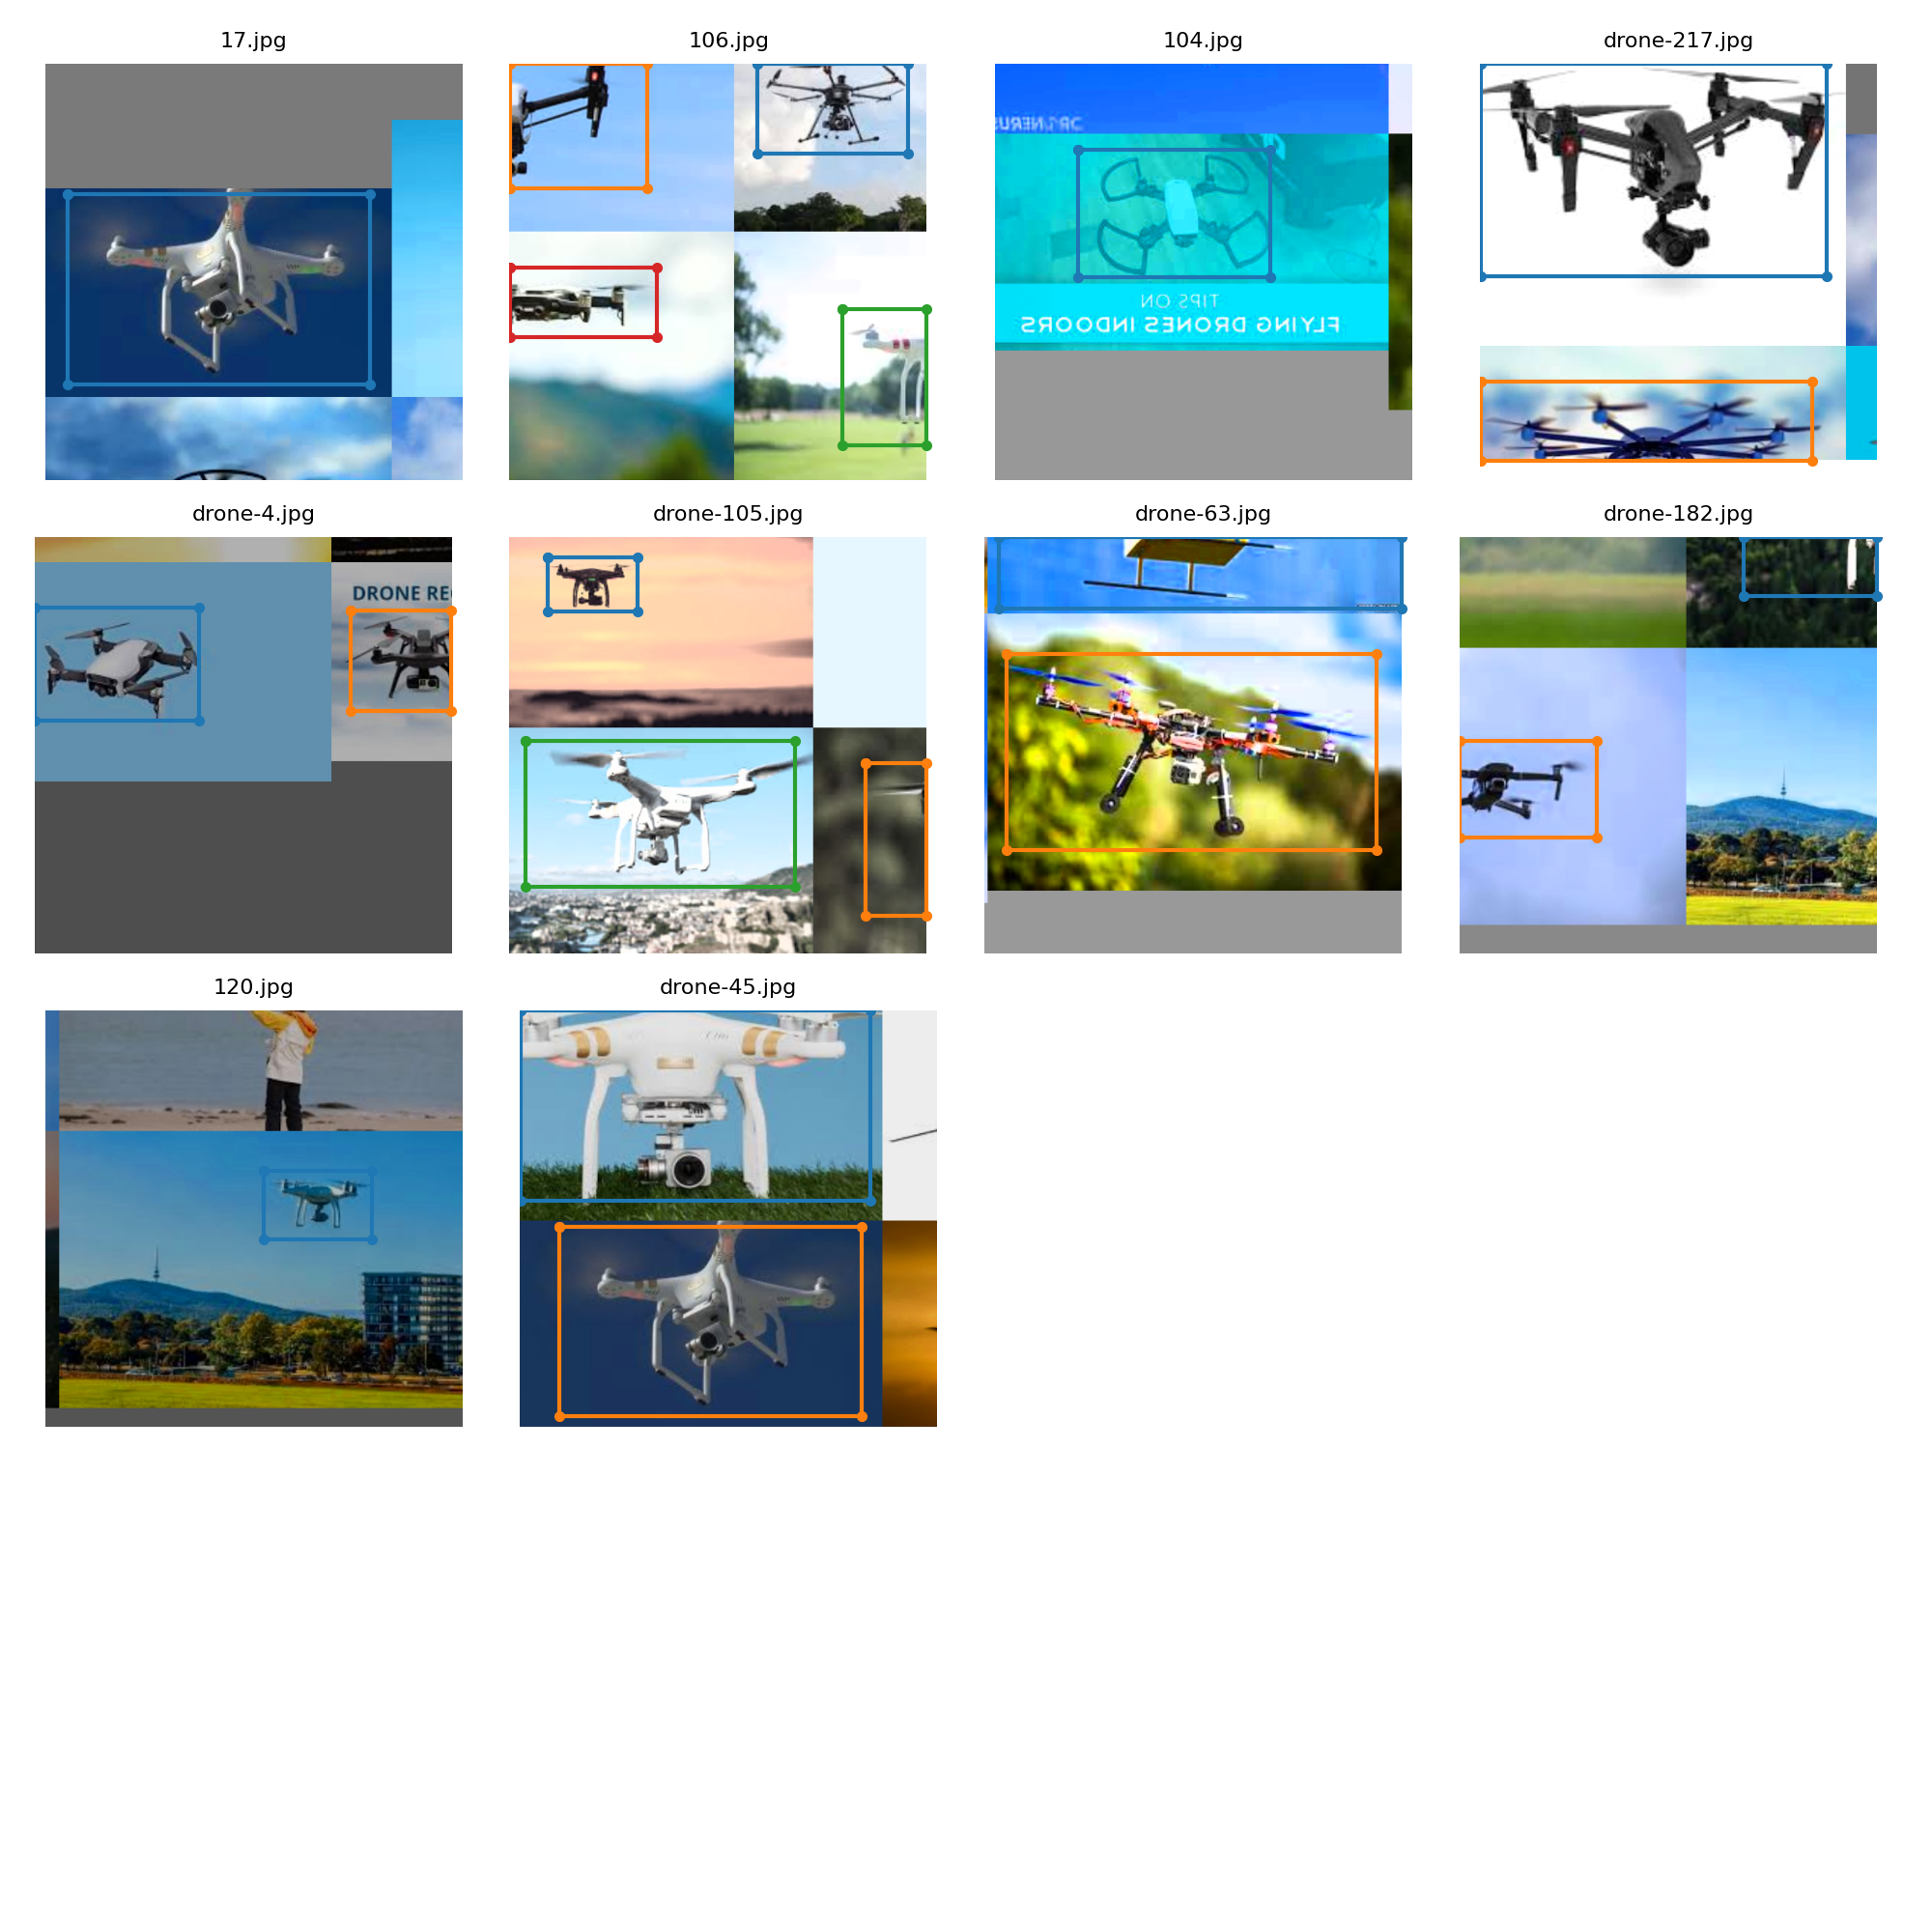

In [9]:
Image(filename='train_batch0.png')

In [10]:
!python detect.py --conf-thres 0.1 --output out_out

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_out', save_txt=False, source='data/customdata/images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/545 data/customdata/images/1.jpg: 320x512 1 drones, Done. (0.017s)
image 2/545 data/customdata/images/10.jpg: 320x512 1 drones, Done. (0.018s)
image 3/545 data/customdata/images/100.jpg: 384x512 1 drones, Done. (0.019s)
image 4/545 data/customdata/images/101.jpg: 384x512 1 drones, Done. (0.017s)
image 5/545 data/customdata/images/102.jpg: 320x512 1 drones, Done. (0.017s)
image 6/545 data/customdata/images/104.jpg: 384x512 1 drones, Done. (0.019s)
image 7/545 data/customdata/images/105.jpg: 384x512 1 dr

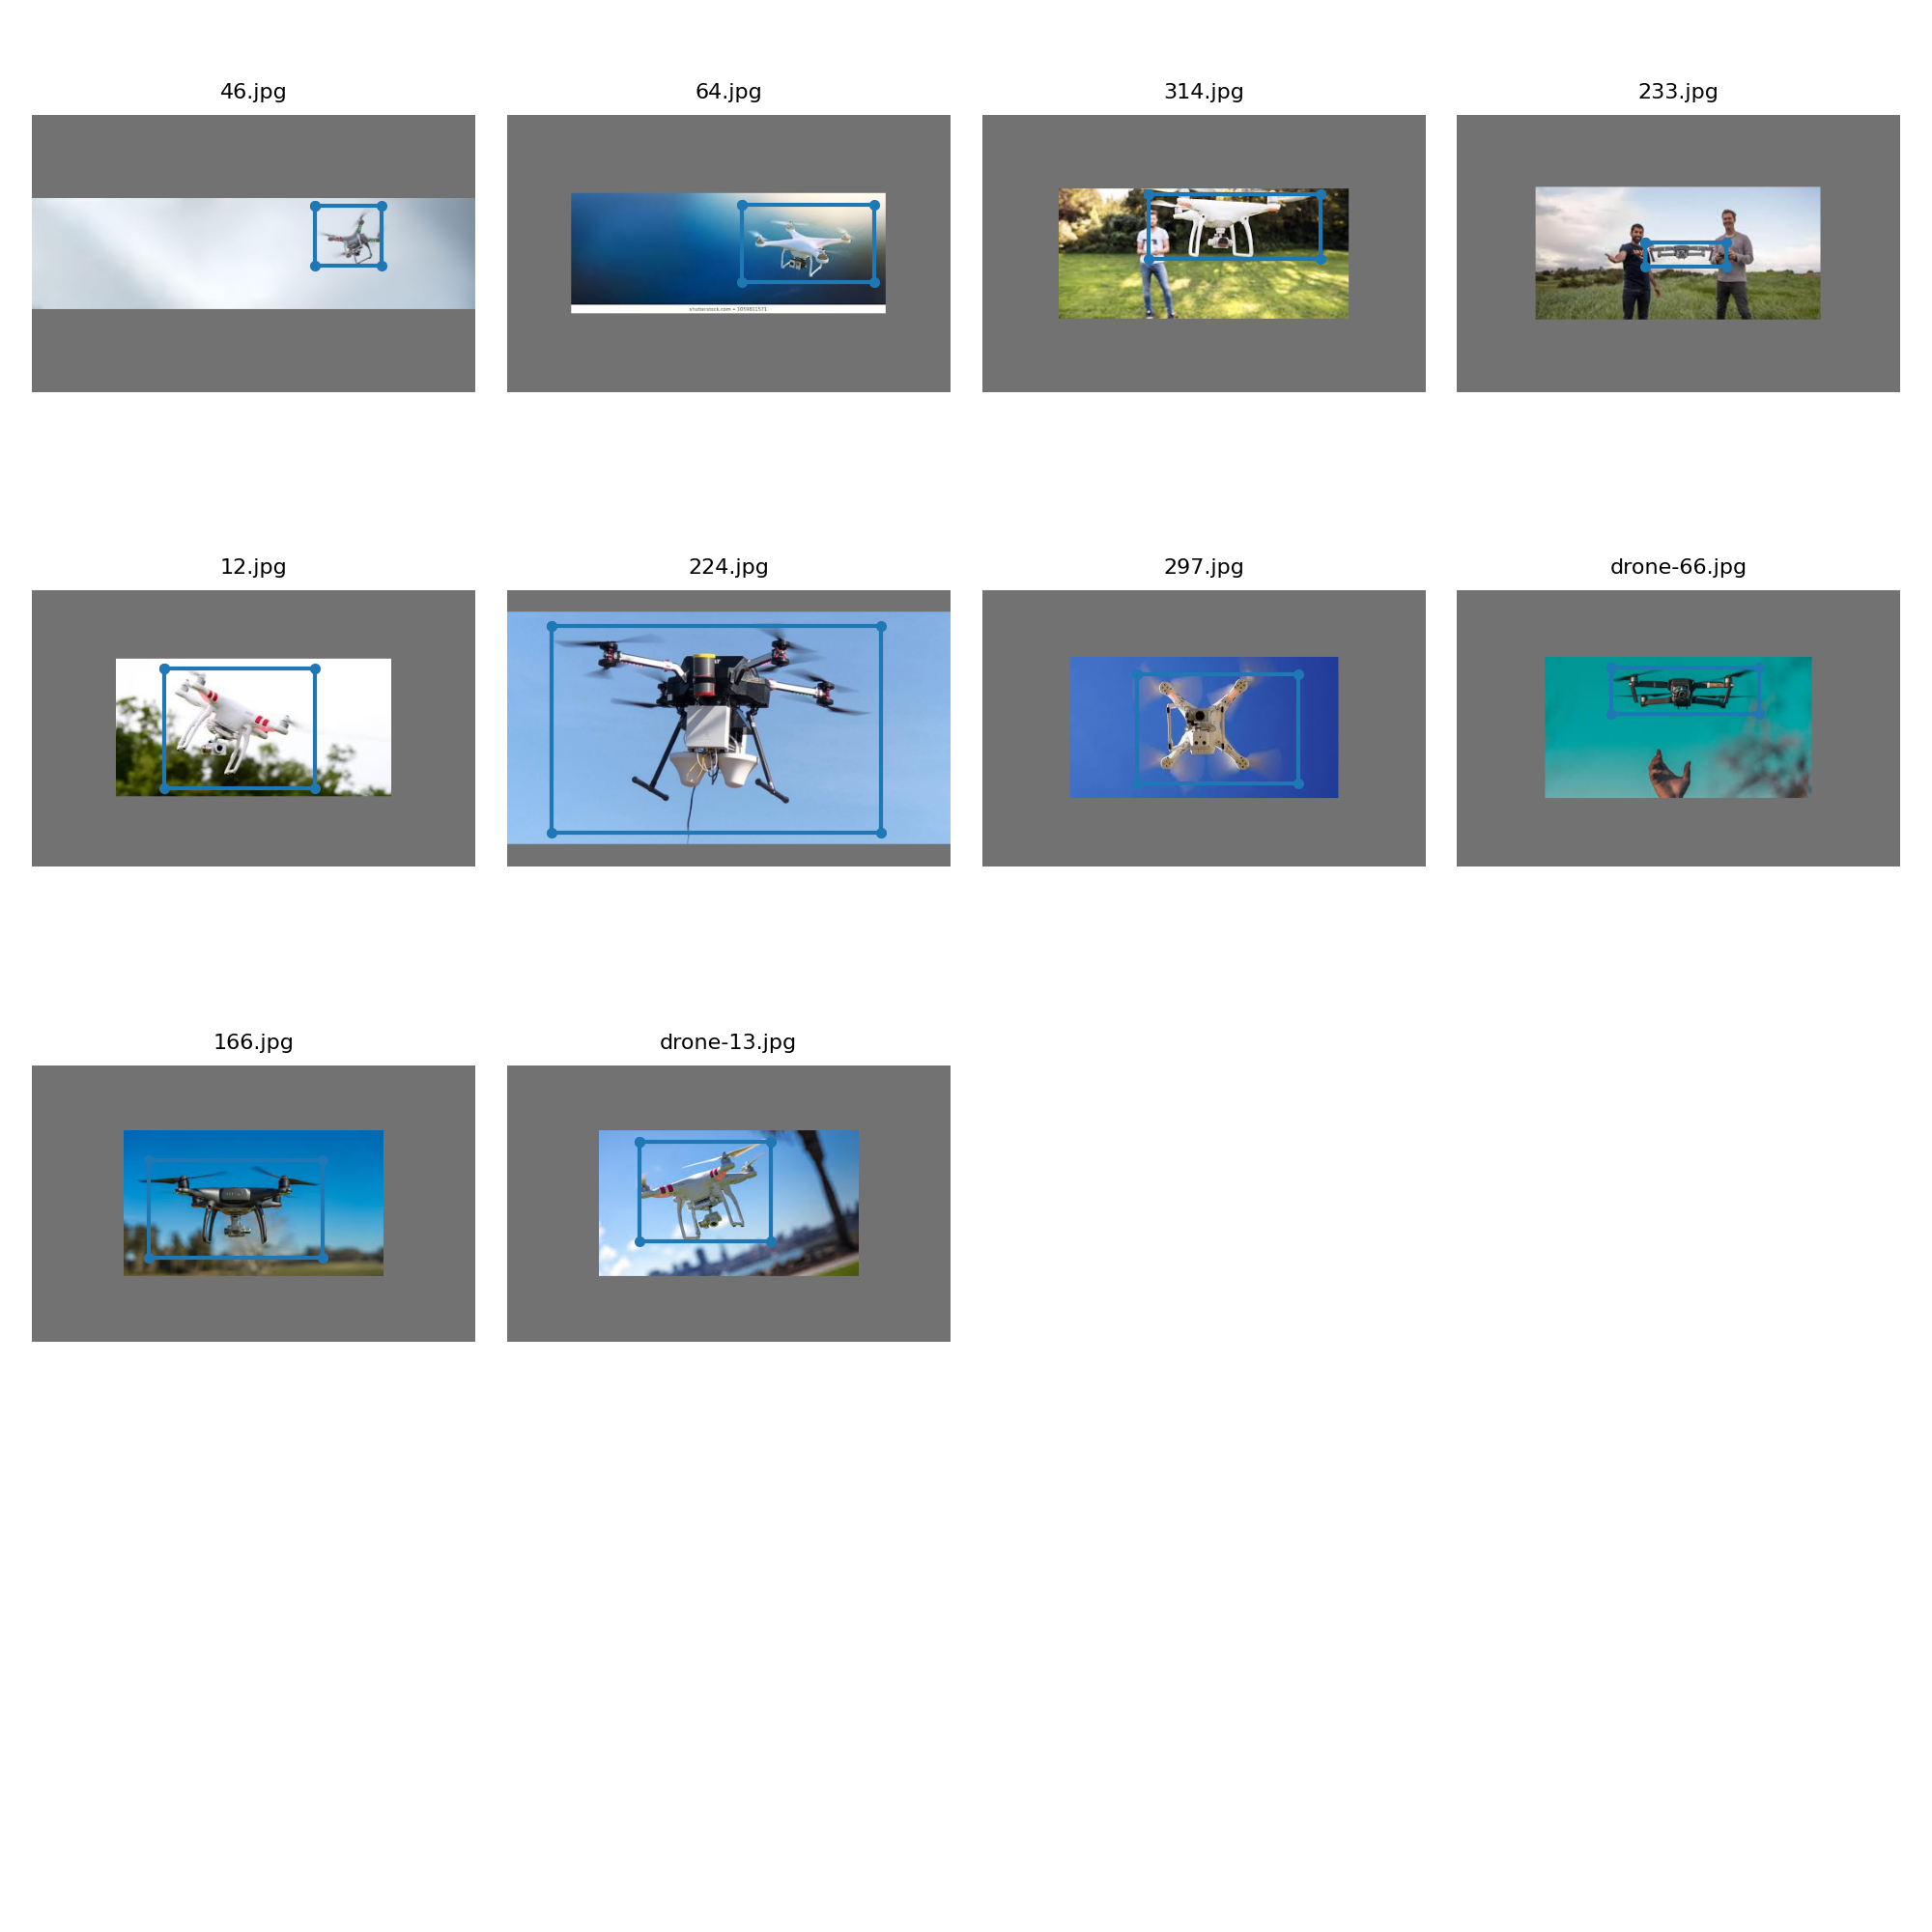

In [11]:
Image(filename='test_batch0.png')

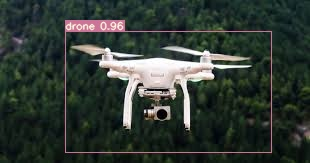

In [12]:
Image(filename='out_out/98.jpg', width=600)

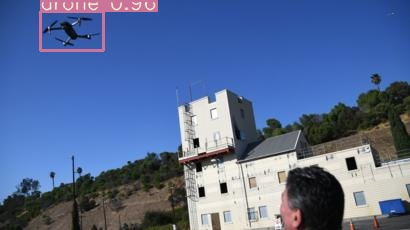

In [13]:
Image(filename='out_out/1.jpg', width=600)

In [15]:
# https://www.bogotobogo.com/VideoStreaming/YouTube/youtube-dl-embedding.php

!pip install --quiet youtube_dl
import youtube_dl 


# url = input("URL of the YouTube to download - ") 
url = 'https://www.youtube.com/watch?v=XdlmoLAbbiQ'

# https://github.com/ytdl-org/youtube-dl/blob/master/youtube_dl/YoutubeDL.py#L128-L278
ydl_opts = {
    'format': 'mp4',       
    # 'outtmpl': '%(id)s',        
    'noplaylist' : True
}  
with youtube_dl.YoutubeDL(ydl_opts) as ydl: 
    ydl.download([url.strip()]) 

# https://www.youtube.com/watch?v=XdlmoLAbbiQ

     |████████████████████████████████| 1.8MB 4.9MB/s 
[youtube] XdlmoLAbbiQ: Downloading webpage
[youtube] Downloading just video XdlmoLAbbiQ because of --no-playlist
[download] Destination: This is the most amazing drone we've seen yet-XdlmoLAbbiQ.mp4
[download] 100% of 44.14MiB in 00:01


In [0]:
! mv "This is the most amazing drone we've seen yet-XdlmoLAbbiQ.mp4" "drone_XdlmoLAbbiQ.mp4"

In [17]:
!python detect.py --source "drone_XdlmoLAbbiQ.mp4" --conf-thres 0.1 --output inference

Streaming output truncated to the last 5000 lines.
video 1/1 (3114/8110) drone_XdlmoLAbbiQ.mp4: 320x512 2 drones, Done. (0.015s)
video 1/1 (3115/8110) drone_XdlmoLAbbiQ.mp4: 320x512 2 drones, Done. (0.015s)
video 1/1 (3116/8110) drone_XdlmoLAbbiQ.mp4: 320x512 2 drones, Done. (0.015s)
video 1/1 (3117/8110) drone_XdlmoLAbbiQ.mp4: 320x512 2 drones, Done. (0.016s)
video 1/1 (3118/8110) drone_XdlmoLAbbiQ.mp4: 320x512 2 drones, Done. (0.015s)
video 1/1 (3119/8110) drone_XdlmoLAbbiQ.mp4: 320x512 2 drones, Done. (0.015s)
video 1/1 (3120/8110) drone_XdlmoLAbbiQ.mp4: 320x512 1 drones, Done. (0.015s)
video 1/1 (3121/8110) drone_XdlmoLAbbiQ.mp4: 320x512 1 drones, Done. (0.015s)
video 1/1 (3122/8110) drone_XdlmoLAbbiQ.mp4: 320x512 2 drones, Done. (0.015s)
video 1/1 (3123/8110) drone_XdlmoLAbbiQ.mp4: 320x512 1 drones, Done. (0.015s)
video 1/1 (3124/8110) drone_XdlmoLAbbiQ.mp4: 320x512 2 drones, Done. (0.015s)
video 1/1 (3125/8110) drone_XdlmoLAbbiQ.mp4: 320x512 Done. (0.015s)
video 1/1 (3126/8110) d

In [18]:
! ls -ld '/content/gdrive/My Drive/DL/weights/yolov3_drones/' || mkdir '/content/gdrive/My Drive/DL/weights/yolov3_drones/'
! rsync -avP 'weights/' '/content/gdrive/My Drive/DL/weights/yolov3_drones/'

drwx------ 2 root root 4096 Apr 23 10:26 '/content/gdrive/My Drive/DL/weights/yolov3_drones/'
sending incremental file list

sent 120 bytes  received 12 bytes  264.00 bytes/sec
total size is 750,948,167  speedup is 5,689,001.27


In [20]:
! ls -ld '/content/gdrive/My Drive/DL/inference/yolov3_drones/' || mkdir '/content/gdrive/My Drive/DL/inference/yolov3_drones/'
! rsync -avP 'inference/' '/content/gdrive/My Drive/DL/inference/yolov3_drones/'

ls: cannot access '/content/gdrive/My Drive/DL/inference/yolov3_drones/': No such file or directory
sending incremental file list
./
drone_XdlmoLAbbiQ.mp4
    177,501,164 100%  184.97MB/s    0:00:00 (xfr#1, to-chk=0/2)

sent 177,544,619 bytes  received 38 bytes  118,363,104.67 bytes/sec
total size is 177,501,164  speedup is 1.00


In [0]:
# upload to youtube from drive and import from drive to photos and from there to youtube upload center
# https://support.google.com/photos/answer/6156103?co=GENIE.Platform%3DAndroid&hl=en